# Making Better Plots - Atomic Volume
*M Kenworthy 14 March 2016*

We'll make a plot of Atomic Volume and then modify it to look similar to the plot shown in the first day slides.

Code is stored in these cells - you can run the contents of a cell by pressing `Shift+Enter` and the result of the cell appears in the space below it.

First, let's load in the matplotlib modules and the atomic radius data:

In [6]:
# import all the modules we need
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from astropy.io import ascii

# read in a table of atomic radii
d = ascii.read("atomic_radii.txt", guess=False)

print(d)

 A  Element  r  
--- ------- ----
  1       H 0.53
  2      He 0.31
  3      Li 1.67
  4      Be 1.12
  5       B 0.87
  6       C 0.67
  7       N 0.56
  8       O 0.48
  9       F 0.42
 10      Ne 0.38
...     ...  ...
 83      Bi 1.43
 84      Po 1.35
 85      At 1.27
 86      Rn  1.2
 89      Ac 1.95
 90      Th  1.8
 91      Pa  1.8
 92       U 1.75
 93      Np 1.75
 94      Pu 1.75
 95      Am 1.75
Length = 93 rows


We now make the matplotlib Figure surface, and put an Axes surfcae in it - this is where the data is plotted when you use a matplotlib plot() or scatter() command.

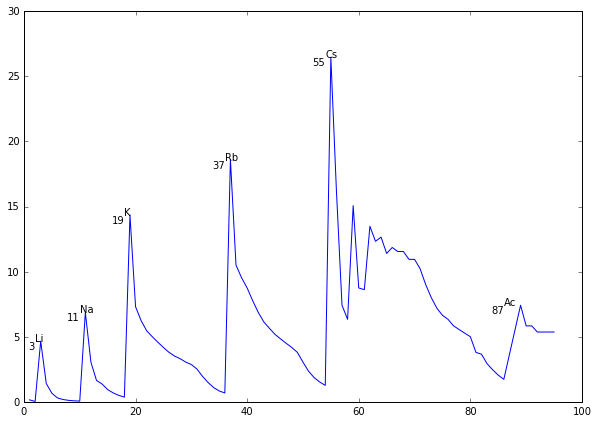

In [7]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

volume = np.power(d['r'],3)

lin1 = plt.plot(d['A'], volume)


alkali_elements = np.array([3,11,19,37,55,87]) - 1

# let's label the alkali elements
for elem in alkali_elements:
    xtext = elem
    ytext = volume[elem]
    element_name = d['Element'][elem]
    ax.text(xtext, ytext, element_name)
    ax.text(xtext, ytext, xtext+1, ha='right', va='top')



Okay, so this leaves a lot to be desired! We need to adjust the properties of both the line and the surrounding Axes, so that we have something like this figure: 

![Atomic Plot](solution.png)

There are many options you can pass to `plt.plot()` to adjust both the `Markers` (the symbols at each data point) and the `Line` that connects the points.

The many, many options for the `Markers` are on the matplotlib page

[Different symbols for the data points (Markers)](http://matplotlib.org/api/markers_api.html)

[how to get dashed or dotted lines](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle)

[specifying colours](http://matplotlib.org/api/colors_api.html)

Here's an example for the `Markers`, just to show you what you can do:


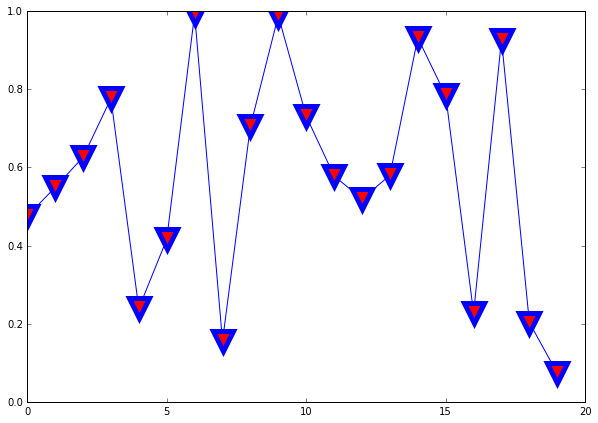

In [8]:
x = np.arange(20)
y = np.random.random(20)

# make our figure
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

lin2 = plt.plot(x, y, marker='v', markerfacecolor='red',
               markeredgecolor='blue', markeredgewidth=5, markersize=20)

And here's for the line connecting them:


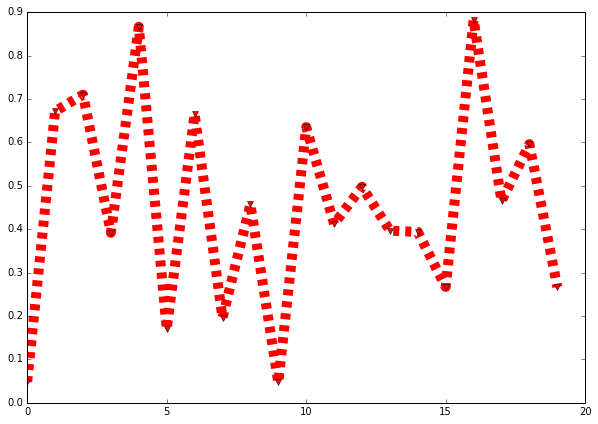

In [9]:
x = np.arange(20)
y = np.random.random(20)

# make our figure
fig = plt.figure(figsize=(10,7))

# important to use a variable to get the add_subplot() value
ax = fig.add_subplot(111)

lin2 = plt.plot(x, y, marker='v', linestyle='--', linewidth=10, color='red')

## Adjusting the plot box
The labels, tick marks and sizes are accessed through the `ax` variable that you specified when drawing the first plot - all the properties of the `Axes` are buried somewhere in there.

Read through the next cell, and comment out any of the `set_` commands to see what the effect is.

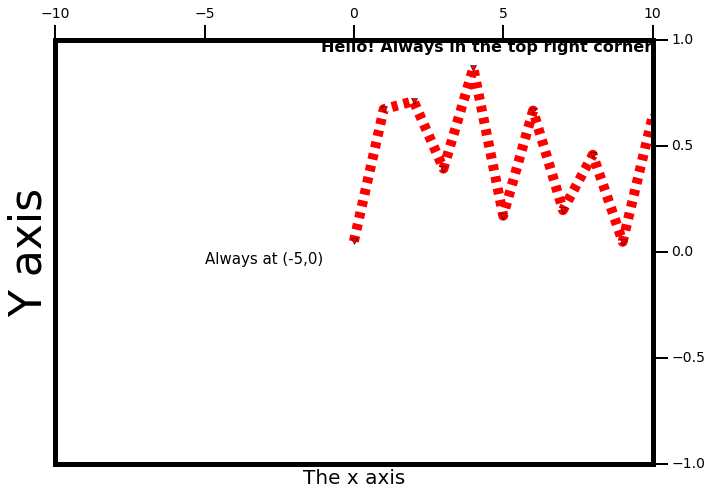

In [10]:
# make our figure
fig = plt.figure(figsize=(10,7))

# important to use a variable to get the add_subplot() value
ax = fig.add_subplot(111)

lin2 = plt.plot(x, y, marker='v', linestyle='--', linewidth=10, color='red')

# now we can adjust the labels and everything else


# set the x and y ranges of your plots
ax.set_xlim(-10,10)
ax.set_ylim(-1,1)

# Only show the numbers and the tick marks on the right and top spines
ax.yaxis.set_ticks_position('right')
ax.xaxis.set_ticks_position('top')


# how to set the size of the fonts for the numbers on your axes
ticks_font = mpl.font_manager.FontProperties(size=14, weight='normal', stretch='normal')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(ticks_font)

    
# make the tick marks thicker and bigger
ax.tick_params('both', which='major', length=15, width=2, direction='out', pad=15)


# make the x and y axes themselves thicker
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(5)




# put on text labels for the two axes
ax.set_xlabel('The x axis', fontsize=20)
ax.set_ylabel('Y axis', fontsize=44)

# putting a label in the plot that moves with the plot
ax.text(-5, 0, 'Always at (-5,0)', ha='left', va='top',fontsize=15)

# text relative to plot box itself
tyb = dict(color='black', fontsize=16, fontweight='bold')
ax.text(1.0, 1.0, 'Hello! Always in the top right corner', ha='right', va='top', transform=ax.transAxes, **tyb)


# if the labels are missing and moved off, this command makes the plot look pretty again!
plt.tight_layout()

## Now it's your turn!

Okay, using the examples above, you can now tweak up the earlier plot. Fill in the cell below to try it:


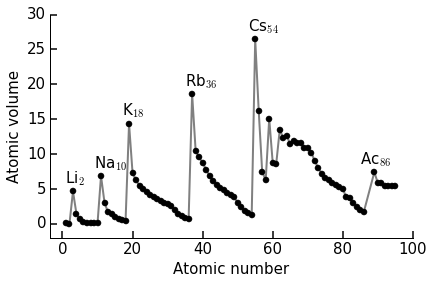

In [102]:
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 1.5

fig = plt.figure(figsize=(6.5,4))
ax = fig.add_subplot(111)

volume = np.power(d['r'],3)


lin1 = plt.plot(d['A'], volume, 'k', ls='None',  marker='.', ms=12)
lin2 = plt.plot(d['A'], volume, 'gray', marker='None', lw=2, zorder=-1)

alkali_elements = np.array([3,11,19,37,55,87]) - 1

# let's label the alkali elements
for elem in alkali_elements:
    xtext = elem
    ytext = volume[elem]
    element_name = d['Element'][elem]
    ax.annotate(xy=(xtext, ytext), 
                s='{0}$_{{{1}}}$'.format(element_name,xtext),
                xytext=(-4,8),
                fontsize=15,
               textcoords='offset points')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlim(-3.5,100)
ax.set_ylim(-2,30)

ax.set_xlabel('Atomic number')
ax.set_ylabel('Atomic volume');

# SOLUTION
This is one possible solution, you may do it differently!

Only read this if you're stuck...

No peeking!

No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!


No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

No peeking!

Oh alright, go on then....


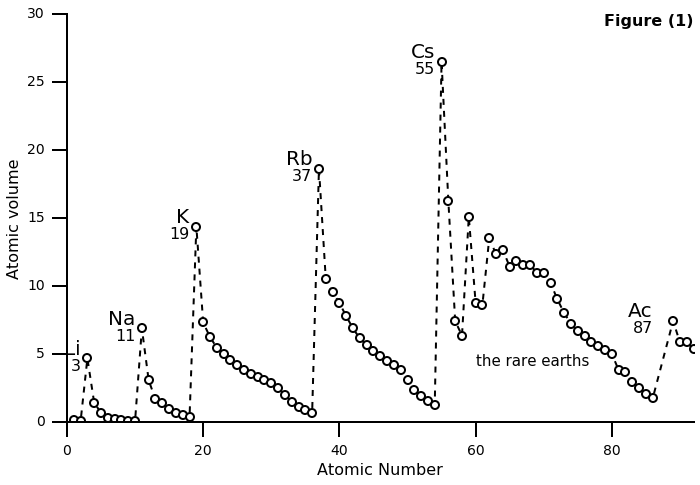

In [98]:
def solution():
    fig = plt.figure(figsize=(10,7))

    ax = fig.add_subplot(111)

    volume = np.power(d['r'],3)

    lin1 = plt.plot(d['A'], volume, marker='o', linestyle='--',
    linewidth=2,
    color='black', markeredgecolor='black', markeredgewidth=2,
    markerfacecolor='white', markersize=8)

    # set the x and y ranges of your plots
    ax.set_xlim(0,92)
    ax.set_ylim(0,30)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # put on taxt labels for the two axes
    ax.set_xlabel('Atomic Number', fontsize=16)
    ax.set_ylabel('Atomic volume', fontsize=16)

    # how to set the font for the numbers on your axes
    ticks_font = mpl.font_manager.FontProperties(size=14, weight='normal', stretch='normal')

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(ticks_font)

    ax.tick_params('both', which='major', length=15, width=2, direction='out', pad=15)

    # make the x and y axes thicker
    for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
    
    alkali_elements = np.array([3,11,19,37,55,87]) - 1

    # let's label the alkali elements
    for elem in alkali_elements:
        xtext = elem
        ytext = volume[elem]
        element_name = d['Element'][elem]
#        print(xtext, ytext, element_name)
        ax.text(xtext, ytext, element_name, ha='right', va='bottom',fontsize=20)
        ax.text(xtext, ytext, xtext+1, ha='right', va='top',fontsize=16)

    # putting a label in the plot that moves with the plot
    ax.text(60, 5, 'the rare earths', ha='left', va='top',fontsize=15)

    # text relative to plot box itself, NOT the 
    tyb = dict(color='black', fontsize=16, fontweight='bold')
    ax.text(1.0, 1.0, 'Figure (1)', ha='right', va='top', transform=ax.transAxes, **tyb)

    # the labels are missing and moved off, but you can recover this by
    # using this command, which resizes the Axes
    plt.tight_layout()
    
    
solution()
